In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
iris = load_iris()
X = iris.data
y = iris.target


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
accuracies = []
k_values = range(1, 11)


In [6]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} -> Accuracy: {acc:.2f}")

K=1 -> Accuracy: 0.97
K=2 -> Accuracy: 1.00
K=3 -> Accuracy: 1.00
K=4 -> Accuracy: 1.00
K=5 -> Accuracy: 1.00
K=6 -> Accuracy: 1.00
K=7 -> Accuracy: 1.00
K=8 -> Accuracy: 1.00
K=9 -> Accuracy: 1.00
K=10 -> Accuracy: 1.00


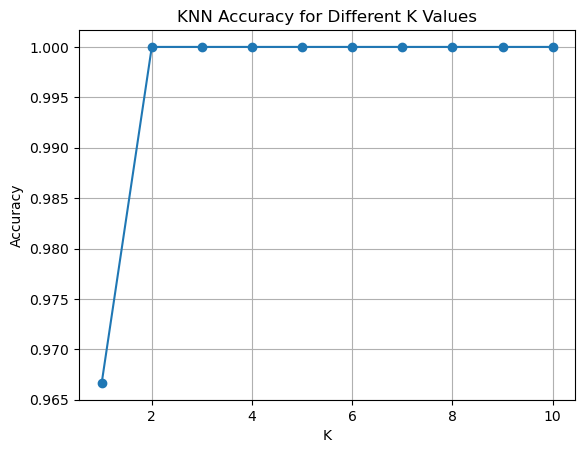

In [7]:
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig("accuracy_vs_k.png")
plt.show()


In [8]:
best_k = k_values[accuracies.index(max(accuracies))]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

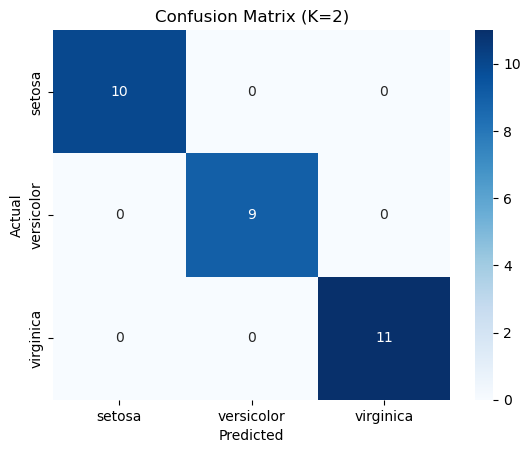

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f'Confusion Matrix (K={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("confusion_matrix.png")
plt.show()